# Analysis of the Dataset

This notebook plots the Figure 4.2 with description:

"Figure 4.2: Each fifth simulation of the VGF-GaAs dataset. The color of each line
in the figure represents the respective simulation number, as shown in the color
bar located in the lower-right part of the figure. For the meaning of variables,
see the caption of Figure 4.1."

In [ ]:
import os

import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_interactions import ioff, panhandler, zoom_factory

data = scipy.io.loadmat('../../data/sequencesinputsOutputs.mat')

Inputs = data["InputsAll"]
Outputs = data["OutputsAll"]

#data_sorted = scipy.io.loadmat('../../matlab/data/trainingSorted.mat')
#print(data_sorted["Inputs"].shape)
#print(data_sorted["Outputs"].shape)

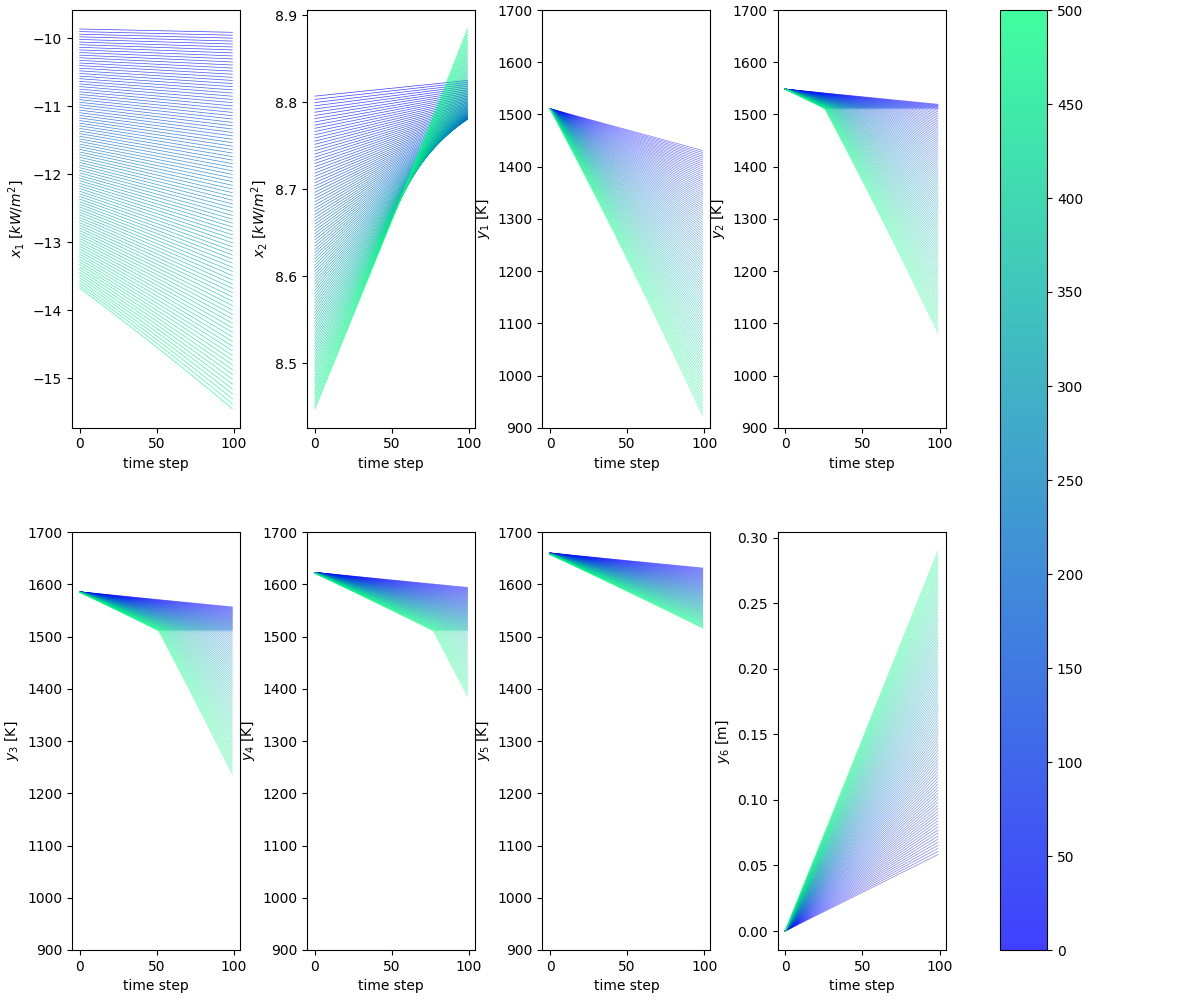

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


c:\Users\janma\Programovani\diplomova_prace\LSTM-crystal-growth\text\img\crystal_growth_dataset.eps


In [11]:
%matplotlib widget

def plot_inputs(xs):
    x_cord = np.arange(xs.shape[1])
    sequences_num = xs.shape[0]
    cmap = plt.get_cmap("winter", sequences_num)
    #with plt.ioff():
    fig, axs = plt.subplots(2, 4, figsize=(12, 10))
    plt.subplots_adjust(wspace=0.4)
    plt.subplots_adjust(hspace=0.25)
    plt.subplots_adjust(bottom=0.05)
    plt.subplots_adjust(left=0.06)
    plt.subplots_adjust(right=0.97)
    plt.subplots_adjust(top=0.99)
    #fig.subplots_adjust(bottom=0.11)
    #fig.subplots_adjust(left=0.11)
    #fig.text(0.5, 0.03, 'Time step', ha='center', va='center')
    #fig.text(0.03, 0.5, 'Temperature (K)', ha='center', va='center', rotation='vertical')
    plot_colorbar(xs, axs)
    for channel in range(xs.shape[2]):
        cur_axs = axs[channel//4, channel%4]
        #cur_axs.set_title(r'$x_{}$'.format(channel+1))
        cur_axs.set_xlabel('time step')
        cur_axs.set_ylabel(r'$x_{}$ [$kW/m^2$]'.format(channel+1))
        for sequence in range(0, xs.shape[0], 5):
            y_cord = xs[sequence,:,channel]/1000
            if channel == 0:
                y_cord = -y_cord
            cur_axs.plot(x_cord, y_cord, color=cmap(sequence), alpha=0.75, linewidth=0.5)
    #plt.tight_layout()
    #plt.show()
    return fig, axs

def plot_outputs(xs, fig, axs):

    x_cord = np.arange(xs.shape[1])
    sequences_num = xs.shape[0]
    cmap = plt.get_cmap("winter", sequences_num)
    #with plt.ioff():
    #fig, axs = plt.subplots(3, 2, figsize=(11, 15))
    #fig.subplots_adjust(bottom=0.1)
    #fig.subplots_adjust(left=0.1)
    #fig.text(0.5, 0.03, 'time step', ha='center', va='center')
    #fig.text(0.03, 0.5, 'Temperature (K), Position', ha='center', va='center', rotation='vertical')
    for channel in range(xs.shape[2]):
        cur_axs = axs[(channel+2)//4, (channel+2)%4]
        #cur_axs.set_title(r'$y_{}$'.format(channel+1))
        cur_axs.set_xlabel('time step')
        if channel < 5:
            cur_axs.set_ylabel(r'$y_{}$ [K]'.format(channel+1))	
            cur_axs.set_ylim(900, 1700)
        else:
            cur_axs.set_ylabel(r'$y_{}$ [m]'.format(channel+1))
        for sequence in range(0, xs.shape[0], 5):
            if channel == 5:
                y_multiple = 10e-5
            else:
                y_multiple = 1
            cur_axs.plot(x_cord, xs[sequence,:,channel]*y_multiple, color=cmap(sequence), alpha=0.5, linewidth=0.5)

    #plt.tight_layout()
    return fig, axs

def plot_colorbar(xs, axs):
    sequences_num = xs.shape[0]
    cmap = plt.get_cmap("winter", sequences_num)
    notm = mpl.colors.Normalize(vmin=0, vmax=sequences_num)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=notm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.linspace(0, sequences_num, 11), boundaries=np.arange(0, sequences_num+1, 1), alpha=0.75, ax=axs.ravel().tolist())

#plot_sequence(x, y)
#plot_minmax_fill_between(Inputs, Outputs)
#plot_color_spectrum(Inputs, "Input")
#plot_color_spectrum(Outputs, "Output")
fig, axs = plot_inputs(Inputs)
fig, axs = plot_outputs(Outputs, fig, axs)
plt.show()

def get_project_path(project_name="LSTM-crystal-growth"):
    """Return project path as a function of project name."""
    current_path = os.path.abspath(os.getcwd())
    # go up one level while not project_name folder is found
    while project_name not in os.path.basename(current_path):
        current_path = os.path.dirname(current_path)
        if os.path.basename(current_path) == current_path:
            raise ValueError("Project path not found.")
    return current_path

project_path = get_project_path()
save_path = os.path.join(project_path, "text", "img", "crystal_growth_dataset.eps")
fig.savefig(save_path, format="eps")


In [6]:
min_x, max_x = np.min(Inputs, axis=(0,1)), np.max(Inputs, axis=(0,1))
print(min_x, max_x)

min_y, max_y = np.min(Outputs, axis=(0,1)), np.max(Outputs, axis=(0,1))
print(min_y, max_y)

[9860.26980261 8444.50369608] [15505.62535409  8887.02152981]
[ 918.09870131 1077.67237741 1232.25032249 1381.98892008 1515.3136279
    0.        ] [1511.15       1548.6007744  1585.95331426 1623.20787723 1660.36472029
 2916.66666667]


In [7]:
ins = Inputs.reshape(-1, Inputs.shape[2])
outs = Outputs.reshape(-1, Outputs.shape[2])

in_mean = np.mean(ins, axis=0)
in_std = np.std(ins, axis=0)
out_mean = np.mean(outs, axis=0)
out_std = np.std(outs, axis=0)

ins_norm = (ins - in_mean)/in_std
outs_norm = (outs - out_mean)/out_std

C:\Users\janma\AppData\Local\Temp\ipykernel_3736\2647602950.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.columns, rotation=90)


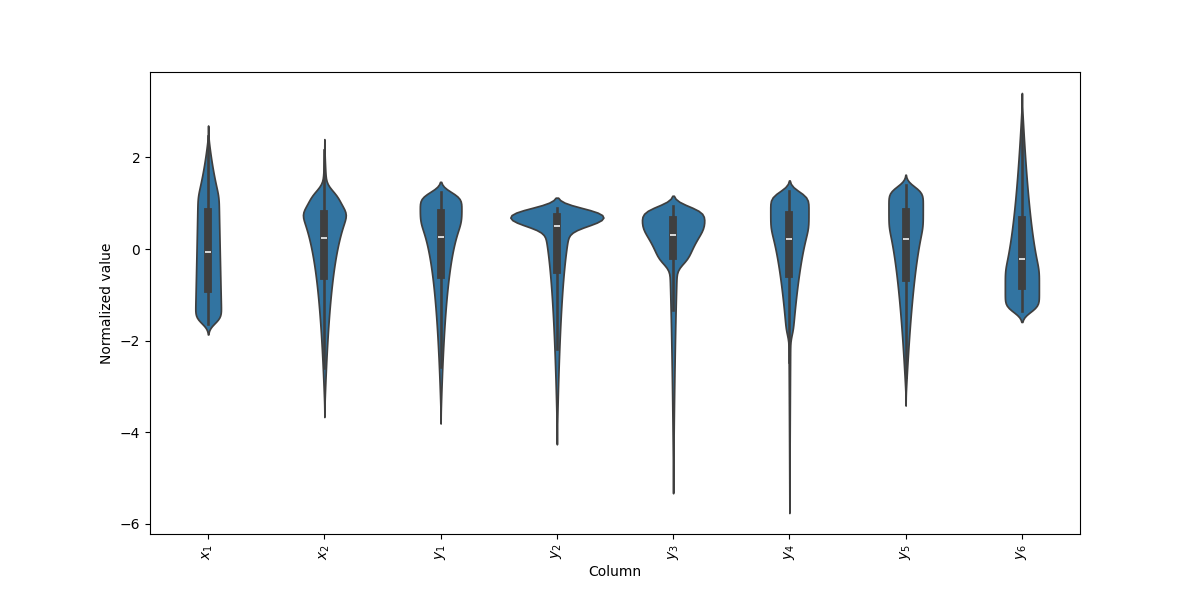

In [12]:
df_x = pd.DataFrame(ins_norm, columns=["$x_{}$".format(i+1) for i in range(ins_norm.shape[1])])
df_y = pd.DataFrame(outs_norm, columns=["$y_{}$".format(i+1) for i in range(outs_norm.shape[1])])
df = pd.concat([df_x, df_y], axis=1)
df_norm = df.melt(var_name='Column', value_name='Normalized value')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized value', data=df_norm)
_ = ax.set_xticklabels(df.columns, rotation=90)